Ecuaciones en Derivadas Parciales dependientes del tiempo

Por Pablo Angulo y Fabricio Macià para ETSIN@UPM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

from scipy.fftpack import dst, fft
import scipy.integrate as integ
import scipy.linalg as la

# Ecuaciones en Derivadas Parciales de evolución

Se llaman así a las ecuaciones en derivadas parciales en las que aparece una variable destacada, usualmente el tiempo $t$ que juega un papel distinto al resto.

Un ejemplo: la ecuación de advección
$$
\dfrac{\partial u}{\partial t}(t,x)+c\dfrac{\partial u}{\partial
x}(t,x)=0,\quad(t,x)  \in\mathbb{R}\times\mathbb{R}. 
$$
La incógnita $u$ depende de $t$ y $x$. Para un valor fijo de $t$, $u(t,\cdot)$ representa la densidad de una sustancia que se transporta a lo largo del espacio en una dirección; la  velocidad del fluido es $c>0$. 

Típicamente, queremos conocer $u(t,\cdot)$ a partir de $u(0,\cdot)=u_0$. Por tanto, se considera un **problema de valor inicial** (como estudiamos para ecuaciones diferenciales ordinarias) donde el dato inicial no es un número sino una función $u_0(x)$.
$$
\begin{array}{ll}
\dfrac{\partial u}{\partial t}(t,x)+c\dfrac{\partial u}{\partial
x}(t,x)=0,\quad &(t,x)  \in\mathbb{R}\times\mathbb{R}.\\ 
u(0,x) = u_0(x),\quad & x\in\mathbb{R}.
\end{array}
$$

Es muy habitual, cuando la solución $u(t,x)$ está definida únicamente para $x\in [a,b]$ en lugar de todo la recta $\mathbb{R}$ requerir que la solución satisfaga **condiciones de contorno**. Por ejemplo, si la densidad se reproduce siguiendo un patrón periódico de periodo $L$ es natural asumir que $u(t,0)=u(t,L)$ para todos los tiempos $t\in\mathbb{R}$.

## Caso modelo: PVI para la ecuación de advección con condiciones de contorno periódicas

El problema completo a resolver (valor inicial + condiciones de contorno) sería: dada $u_0(x)$ definida en $x\in[0,L]$ encontrar $u(t,x)$ que cumpla
$$
\begin{array}{ll}
\dfrac{\partial u}{\partial t}(t,x)+c\dfrac{\partial u}{\partial
x}(t,x)=0,\quad &\left(  t,x\right)  \in\mathbb{R}\times [0,L],\\
u(t,0) = u(t,L),\quad & t\in\mathbb{R},\\
u(0,x) = u_0(x),\quad & x\in [0,L].
\end{array}
$$
Este es un ejemplo muy sencillo, que se puede resolver explícitamente. La solución viene dada por 
$$
u(t,x)=u_0(x-ct)
$$
donde asumimos que hemos extendido $u_0(x)$ a una función periódica, de periodo $L$, a todos los valores $x\in\mathbb{R}$. 

## Análisis de Fourier

Vamos a dar una forma alternativa para encontrar esta solución. En este ejemplo tan sencillo no es muy natural; pero es útil para analizar ecuaciones más complicadas así como para comprender las propiedades de estabilidad de los métodos numéricos que veremos más adelante. 

Expandimos la solución $u(t,x)$ en **serie de Fourier**:
$$
u(x,t)=\sum_{k=-\infty}^{+\infty}\widehat{u}_{k}(t)e^{\frac{2\pi}{L}ikx}, 
$$
donde los coeficientes (o modos) de Fourier vienen dados por:
$$
\widehat{u}_{k}(t)=\int_{0}^{L}u(t,x)
e^{-\frac{2\pi}{L}ikx}\frac
{dx}{L}.
$$
cada uno de los modos $\widehat{u}_{k}$ es una función de $t\in\mathbb{R}$ a valores complejos. 

Realizando una integración por partes obtenemos:
$$
0=\int_{0}^{L}\left[  \frac{\partial u}{\partial t}\left(
x,t\right) +c\frac{\partial u}{\partial x}\left(  t,x\right)
\right] e^{-\frac{2\pi}{L}ikx}\frac
{dx}{L}=\frac{d\widehat{u}_{k}}{dt}(t)+c\frac{2\pi}{L}ik\widehat{u}_{k}(t).
$$
Esta expresión no es más que una ecuación diferencial ordinaria para cada uno de los modos $\widehat{u}_{k}(t)$ cuya
solución es
$$
\widehat{u}_{k}(t)=e^{-c\frac{2\pi}{L}ikt}\widehat{u}_{k}\left(  0\right)  . 
$$
Bien entendido, la condición inicial en nos impone que:
$$
\widehat{u}_{k}\left(  0\right)  =\int_{0}^{L}u_{0}(x) e^{-\frac{2\pi}{L}ikx}\frac{dx}{L}.
$$
El punto de vista de Fourier nos muestra nítidamente el carácter conservativo de la ecuación de transporte. El módulo de cada coeficiente de Fourier satisface:
$$
|\widehat{u}_{k}(t)|=|\widehat{u}_{k}(0)|,\qquad\text{para todo }%
t\in\mathbb{R}. 
$$
Por lo tanto la amplitud de cada uno de los modos es constante en el tiempo.

## Método espectral para resolver la ecuación de advección

Vemos esto en un ejemplo numérico. Vamos a calcular primero los coeficientes de Fourier 
$$
\hat{f}_k:=\int_{0}^{L}f(x)
e^{-\frac{2\pi}{L}ikx}\frac
{dx}{L},\quad k\in\mathbb{Z}.
$$
de una función $f(x)$. Conviene observar que, como $f(x)$ siempre es un número real se cumple que:
$$
\hat{f}_{-k} = \overline{ \hat{f}_k}.
$$
Por tanto, sólo es necesario calcular $\hat{f}_k$ para $k=0,1,2,\dots$. La función $f$ se reconstruye entonces como:
$$
f(x)=\hat{f}_0 + \sum_{k=1}^\infty (\hat{f}_k e^{\frac{2\pi}{L}ikx} + \overline{ \hat{f}_k}e^{-\frac{2\pi}{L}ikx}).
$$
En el sumatorio aparece sumados un número complejo y su conjugado. Por tanto:
$$
f(x)=\hat{f}_0 + 2\sum_{k=1}^\infty \mathrm{Re}(\hat{f}_k e^{\frac{2\pi}{L}ikx}).
$$
El código siguiente implementa estas operaciones. Los coeficientes de Fourier se obtienen usando `scipy.fftpack.fft` que implementa el algoritmo conocido como **Transformada Rápida de Fourier**

In [2]:
dpi = 2*np.pi
L = 1
x1,x2,x3 = 0.4,0.5,0.6
def u(x):
    return np.exp(-((x-0.5)**2)/0.01)
#    return np.sin(np.pi*x/L)
#    return x*(1-x)
#    #Función definida "a trozos"
#    return np.piecewise(x,
#        [(x>=x1)&(x<x2),(x>=x2)&(x<x3)],
#        [lambda y:(y-x1)/(x2-x1),lambda y:(x3-y)/(x3-x2), 0])

xs = np.linspace(0,L,200)
us = u(xs)
plt.plot(xs, us)
plt.xlabel('x')
plt.ylabel('u')
plt.title('initial density')
plt.show()


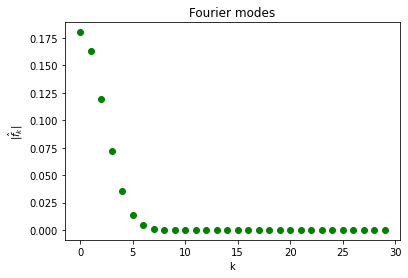

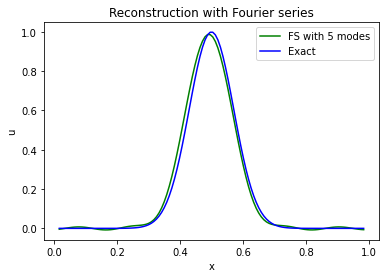

In [3]:
N = 30 # número de modos de Fourier
h = L/(2*N)
xs = np.linspace(h, L-h, 2*N) # muestramos en el doble de nodos

us = u(xs)

# Calculamos los coeficientes de Fourier usando la FFT
Uk = fft(us)*h/L

plt.plot(abs(Uk[:N]),'go')
plt.title('Fourier modes')
plt.xlabel('k')
plt.ylabel('$|\hat{f}_k|$')
plt.show()

# Reconstruimos la función a partir de un número de modos M

M = 5

x_eval = np.linspace(h, L-h, max(4*N,100))
FS = Uk[0].real*np.ones_like(x_eval)

for k in range(1,M+1):
    fase = complex(0,(dpi*k/L))
    onda_eval = np.exp(x_eval*fase)
    FS     = FS + 2*(Uk[k]*onda_eval).real

plt.plot(x_eval, FS, 'g-', label='FS with %d modes'%M)
plt.plot(x_eval, u(x_eval), 'b-', label='Exact')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()         
plt.title('Reconstruction with Fourier series')

plt.show()

Utilizamos ahora la serie de Fourier para reconstruir la solución de la ecuación de advección considerando los $M>0$ primeros modos:
$$
u(t,x)\approx\widehat{u}_0 + 2\sum_{k=1}^M \mathrm{Re}(\widehat{u}_k(t) e^{\frac{2\pi}{L}ikx})
$$
donde
$$
\widehat{u}_{k}(t)=e^{-c\frac{2\pi}{L}ikt}\widehat{u}_{k}\left(  0\right)  . 
$$
Observamos que el modo de Fourier $\widehat{u}_{0}$ correspondiente a $k=0$ no varía con $t$.

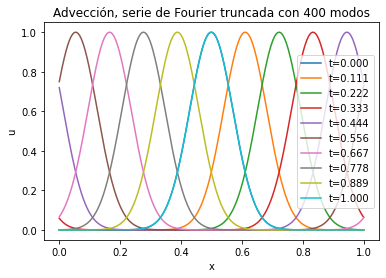

In [4]:
L = 1

x1,x2,x3 = 0.4,0.5,0.6
def u(x):
    return np.exp(-((x-0.5)**2)/0.01)
#    return np.sin(np.pi*x/L)
#    return x*(1-x)
#    #Función definida "a trozos"
#    return np.piecewise(x,
#        [(x>=x1)&(x<x2),(x>=x2)&(x<x3)],
#        [lambda y:(y-x1)/(x2-x1),lambda y:(x3-y)/(x3-x2), 0])

c = 1 # velocidad del sonido
T = L/c # tiempo final
t0 = 0 # tiempo inicial
Nt = 10 
dt = T/Nt # paso temporal


N = 400 # numero de modos de Fourier

h = L/(2*N)
xs = np.linspace(h, L-h, 2*N)

us = u(xs) # dato inicial

# Calculamos los coeficientes de Fourier usando la FFT
Uk = h/L*fft(us)[:N+1]

x_eval = np.linspace(h, L-h, 2*N)
    
K = np.arange(N+1)
M = N

for t in np.linspace(t0,T,Nt):  
    tfase = -complex(0,dpi/L*c*t)
    Uk_t = Uk*np.exp(tfase*K)
    FS = Uk_t[0].real*np.ones_like(x_eval)
    for k in range(1,M+1):
        fase = complex(0,(dpi*k/L))
        onda_eval = np.exp(x_eval*fase)
        FS     = FS + 2*(Uk_t[k]*onda_eval).real
    plt.plot(x_eval, FS, label='t=%.3f'%t)    
                
plt.title('Advección, serie de Fourier truncada con %d modos'%M)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()

## Diferencias finitas

Vamos ahora a investigar otro método para resolver la ecuación de advección, mucho más cercano a los métodos que introdujimos para resolver ecuaciones diferenciales ordinarias.

La idea es reemplazar las derivadas con respecto a $t$ y $x$ por aproximaciones numéricas del tipo que vimos en el cuaderno de derivación.

Introducimos $N_t$ y $N_x$ el número de nodos temporales y espaciales respectivamente. Consideramos un intervalo de tiempos $[0,T]$ y definimos:
$$
k = \frac{T}{N_t},\qquad h = \frac{L}{N_x}.
$$
La idea es aproximar los valores de la solución exacta en los nodos:
$$
u(kn,hj)\approx u^n_j,\qquad n=0,\dots,N_t,\quad j=0,\dots,N_x, 
$$
donde los $u^n_j$ satisfacen:

- Método upwind:
$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{k}+c\frac{u_{j}^{n}-u_{j-1}^{n}}
{h}=0,\qquad n=0,\dots, N_t,\;j=0,\dots,N_x.
$$
- Método basado en diferencias centradas
$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{k}+c\frac{u_{j+1}^{n}-u_{j-1}^{n}}
{2h}=0,\qquad n=0,\dots, N_t,\;j=0,\dots,N_x.
$$
- O elige tu propia discretización...

En cualquier caso se tienen que cumplir la condición inicial:
$$
u^0_j = u_0(hj),\qquad j=0,\dots,N_x,
$$
y la condición de contorno periódica:
$$
u^n_0 = u^n_{N_x}, \qquad n=0,\dots,N_t.
$$

El número de Courant es CFL=0.286


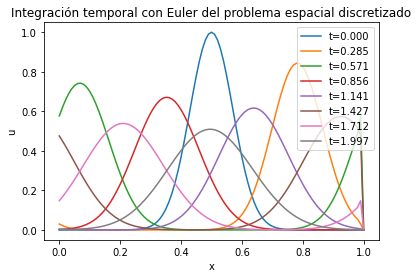

In [5]:
def init_fn(x):
    return np.exp(-(x-.5)**2/0.01)

def diff_fin_matrix(n):
    return np.diag(np.ones(n)) - np.diag(np.ones(n-1),-1) - np.diag([1],n-1)

def diff_finc_matrix(n):
    return np.diag(1/2*np.ones(n-1),1) - np.diag(1/2*np.ones(n-1),-1) - np.diag([1/2],n-1) + np.diag([1/2],1-n)

L  = 1
Nx = 100
h  = L/Nx
c  = 1

t0 = 0
tf = 2
Nt = 700
k  = (tf - t0)/Nt

courant = c*k/h

print('El número de Courant es CFL=%.3f'%(courant))
xs = np.linspace(0, L , Nx+1)
xs_int = xs[:-1]
u0 = init_fn(xs_int)

A1 = -(c/h)*diff_fin_matrix(Nx)
A2 = -(c/h)*diff_finc_matrix(Nx)
u = np.zeros((Nt+1,Nx+1)) #solution to ADV
u[0,:-1] = u0
for j in range(Nt):
    ut_int = u[j,:-1]
    u_new = ut_int + k*A1@ut_int
    u[j+1,:-1] = u_new
u[:,Nx-1] = u[:,0]   # we impose periodic BCs

pasos = 8
for t in np.linspace(0, Nt-1, pasos):
    plt.plot(xs, u[int(t),:], label='t=%.3f'%(t*k))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal con Euler del problema espacial discretizado')
plt.show()

## Estabilidad y número de Courant

Hay que tener presente que, a diferencia que lo que sucedía con los métodos para resolver EDOs, la aproximación de una EDP mediante diferencias finitas **puede no ser convergente** incluso cuando los métodos usados para discretizar las derivadas parciales lo son.

En todo caso, una cantidad muy relevante a la hora de aproximar la ecuación de advección con diferencias finitas es el **número de Courant Friedrichs Levy (CFL)** definido por:
$$
\gamma := c\frac{k}{h},
$$
que relaciona los pasos de discretización espacial y temporal.

### Ejercicio.
Comprueba utilizando el código anterior que la discretización basada en diferencias centradas no converge hacia la solución exacta con un número de Courant $\gamma$ fijo. Para ello prueba tomando $\gamma = 1, 0.5, 0.2$ y comprueba que si integramos la ecuación de advección con $c=L=1$ hasta $T=2$ la solución explota.

### Ejercicio.
Comprueba utilizando el código anterior y siguiendo las líneas del ejercicio anterior que el método upwind cumple:
- Es convergente cuando $\gamma = 1$ y $k,h$ se hacen prequeños.
- Es inestable si $\gamma >1$.
- Es convergente si $\gamma <1$, aunque la calidad de la aproximación decae cuando $T$ aumenta.

Si deseáis comprender mejor la naturaleza de estos fenómenos podéis leer más despacio en estas referencias:

 - Leo M. González, Fabricio Macià, Antonio Souto Iglesias: Estabilidad, aproximación numérica y mecánica de fluidos, disponible [aquí](EstabilidadYFluidos.pdf).
 - J.M. Sanz-Serna: Fourier Techniques in Numerical Methods for Evolutionary Problems

# Ecuaciones de orden superior. Ecuación de ondas

Vamos a estudiar distintas formas de resolver la ecuación de ondas que modeliza las vibraciones de una cuerda.

$$
\partial_{tt}u = c^2\partial_{xx}u.
$$

Comenzamos con una cuerda vibrante en una cierta posición inicial.
Para simplificar, tomaremos la velocidad inicial igual a cero, y las condiciones de contorno corresponden a los dos extremos fijos. Entre los exámenes y prácticas de otros cursos podrás encontrar más variantes, y si necesitas alguna otra, puedes consultar a los profesores.

Cuando hayas terminado de recorrer el cuaderno, te recomendamos que pruebes a cambiar el perfil inicial.

Text(0.5, 1.0, 'initial position of the string (initial speed is zero)')

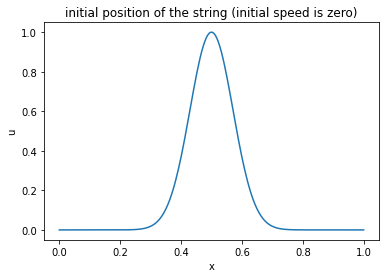

In [6]:
L = 1
x1,x2,x3 = 0.4,0.5,0.6
def init_fn(x):
    return np.exp(-((x-0.5)**2)/0.01)
#    return np.sin(np.pi*x/L)
#    return x*(1-x)
#    #Función definida "a trozos"
#    return np.piecewise(x,
#        [(x>=x1)&(x<x2),(x>=x2)&(x<x3)],
#        [lambda y:(y-x1)/(x2-x1),lambda y:(x3-y)/(x3-x2), 0])

xs = np.linspace(0,L,200)
us = init_fn(xs)
plt.plot(xs, us)
plt.xlabel('x')
plt.ylabel('u')
plt.title('initial position of the string (initial speed is zero)')

## Serie de senos

Comenzamos por recordar la __serie de senos__ de una función f.

Una función $f:[0,L]\rightarrow\mathbb{R}$ tal que $f(0)=f(L)=0$ se puede escribir como suma de una _serie de senos_
$$
f(x)=\sum_{k=1}^\infty \hat{f}_k \sin\left(\frac{\pi k}{L}x\right)
$$
donde
$$
\hat{f}_k = \frac{2}{L}\int_0^L f(x)\sin\left(\frac{\pi k}{L}x\right)\: d x
$$

In [7]:
f = init_fn

#Primeros coeficientes de la serie de senos de f
for k in range(1,6):
    integral, error = integ.quad(lambda x : 2./L * f(x)*np.sin(np.pi*k*x), 0., L )
    print(k, integral)

1 0.3458510871547148
2 3.272272894695979e-17
3 -0.2838983383293982
4 -6.11286016239204e-17
5 0.19129792592877481


## Discrete sine transform

El algoritmo __FFT__ (Fast Fourier Transform) es una forma muy eficiente de aproximar los coeficientes de la serie de Fourier.

La __discrete sine transform__ es una versión discreta de la serie de senos, análoga a la DFT (Discrete Fourier Transform) para la transformada de Fourier.

En general no se usa en tratamiento de señales, como la transformada de Fourier, pero es útil precisamente para resolver ecuaciones en derivadas parciales por técnicas espectrales.

In [8]:
# Aproximamos los primeros coeficientes de la serie de senos de f
# mediante la dst
# Compara con los valores obtenidos antes
N = 20
h = L/(N+1)
xs = np.linspace(h, L-h, N)
fs = f(xs)
Xk = dst(fs)*(L/(N+1))
Xk[:6]

array([ 3.44977505e-01, -2.42952691e-17, -2.77509297e-01,  4.68651594e-17,
        1.79577143e-01, -6.87776413e-17])

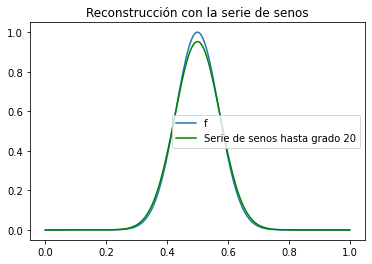

In [9]:
# Aproximamos los los primeros coeficientes de la serie de senos de f
# mediante la dst
N  = 20
h  = L/(N+1)
xs = np.linspace(h, L-h, N)
fs = f(xs)
Xk = dst(fs)*(L/(N+1))

#Dibujamos los Coeficientes de la serie de senos
plt.plot(Xk[:20],'go', label='coeficientes')
plt.legend()
plt.title('Coeficientes de la serie de senos')

#Dibujamos la función f
plt.figure()
x_eval = np.linspace(0, L, 200)
f_eval = f(x_eval)
plt.plot(x_eval,f_eval, label='f')

#reconstrucción de la función mediante su serie de senos truncada
senos = np.zeros_like(x_eval)
for k in range(N):
    onda      = lambda x: np.sin((np.pi*(k+1)/L)*x)
    onda_eval = onda(x_eval)
    senos     = senos + Xk[k]*onda_eval

plt.plot(x_eval, senos, 'g-', label='Serie de senos hasta grado %d'%N)
plt.title('Reconstrucción con la serie de senos')
plt.legend()

Al sumar sólo algunos de los términos de la serie, tenemos una aproximación a la función $f$:

$$
f(x)\approx\sum_{k=1}^N \hat{f}_k \sin\left(\frac{\pi k}{L}x\right)
$$

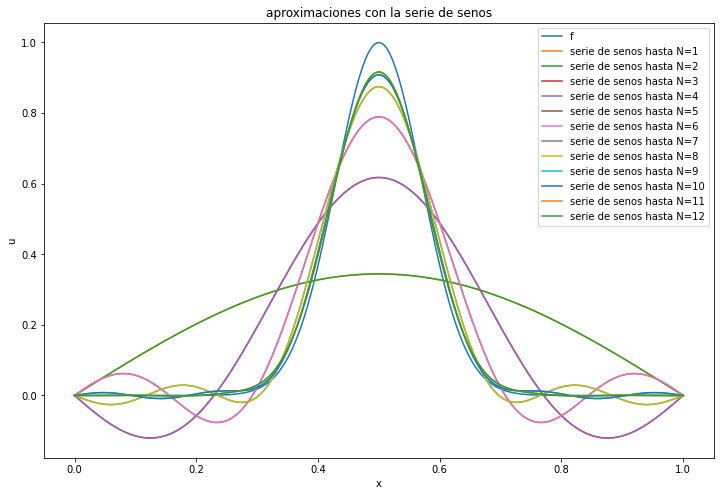

In [10]:
# Dibujamos las sumas parciales de la serie de senos...
f = init_fn
N = 12
h = L/(N+1)
xs = np.linspace(h, L-h, N)
fs = f(xs)
Xk = dst(fs)*(L/(N+1))

plt.figure(figsize=(12,8))
plt.plot(x_eval, f_eval, label='f')

senos = np.zeros_like(x_eval)
for k in range(N):
    onda = lambda x: np.sin((np.pi*(k+1)/L)*x)
    onda_eval = onda(x_eval)
    senos     = senos + Xk[k]*onda_eval
    plt.plot(x_eval, senos, label='serie de senos hasta N=%d'%(k+1))

plt.xlabel('x')
plt.ylabel('u')
plt.title('aproximaciones con la serie de senos')
plt.legend()

### Ejercicio

 - Aproxima con series de senos otras funciones similares pero que no sean diferenciables: ¿empeora mucho la calidad de la aproximación?

> - Por comodidad, empaquetamos el código que dibuja la aproximación con la serie de senos

In [11]:
def plot_serie_senos(f, N=20):
    # Aproximamos los los primeros coeficientes de la serie de senos de f
    # mediante la dst
    h  = L/(N+1)
    xs = np.linspace(h, L-h, N)
    fs = f(xs)
    Xk = dst(fs)*(L/(N+1))

    x_eval = np.linspace(0, L, 200)
    f_eval = f(x_eval)
    plt.figure(figsize=(12,8))
    plt.plot(x_eval, f_eval, label='f')

    senos = np.zeros_like(x_eval)
    for k in range(N):
        onda = lambda x: np.sin((np.pi*(k+1)/L)*x)
        onda_eval = onda(x_eval)
        senos     = senos + Xk[k]*onda_eval
        plt.plot(x_eval, senos, label='serie de senos hasta N=%d'%(k+1))

    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('aproximaciones con la serie de senos')
    plt.legend()

> - Podemos definir una función continua pero no diferenciable con máximos o mínimos de funciones lineales (de hecho así aparecen habitualmente).

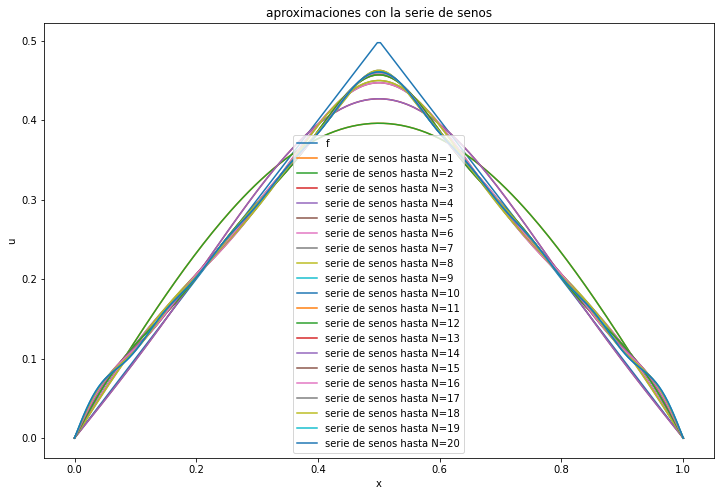

In [12]:
def f_nl(x):
    #Hay que usar np.minimum para sacar el mínimo punto a punto
    return np.minimum(x, 1-x)

plot_serie_senos(f_nl)

> - Podemos combinar máximos, mínimos de funciones lineales arbitrarias y multiplicar por $\sin(\pi x)$ o por $x(1-x)$ para asegurarnos de que vale 0 en los extremos del intervalo.

In [13]:
# Para tomar el mínimo de varios arrays, es mejor usar np.min
# porque np.minimum solo funciona para dos arrays
np.min([xs, 1-xs, 4*(xs-0.3)], axis=0).shape

(12,)

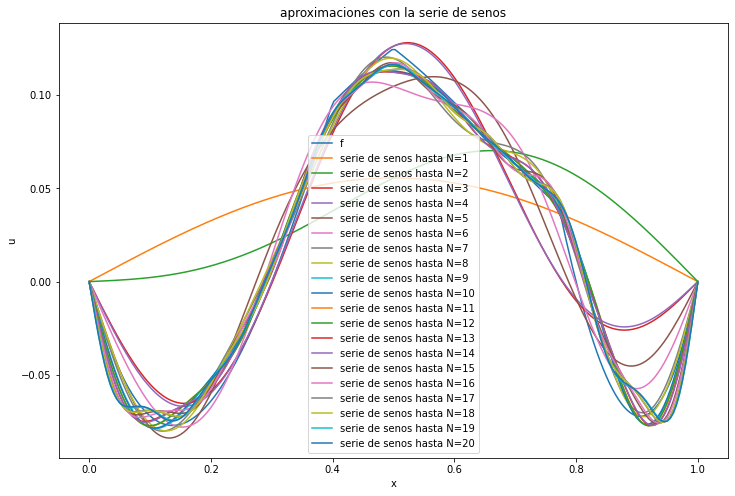

In [14]:
def f_nl(x):
    return np.min([x, 1-x, 4*(x-0.3), 8*(.8-x)], axis=0)*x*(1-x)

plot_serie_senos(f_nl)

> - (opcional) También podemos definir funciones a trozos con `np.piecewise`.

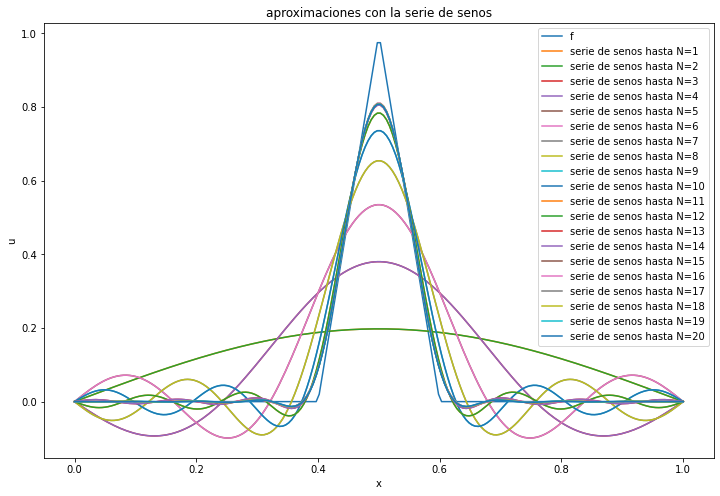

In [15]:
x1,x2,x3 = 0.4,0.5,0.6
def f_pl(x):
    #Función definida "a trozos"
    return np.piecewise(x,
        [(x>=x1)&(x<x2),(x>=x2)&(x<x3)],
        [lambda y:(y-x1)/(x2-x1),lambda y:(x3-y)/(x3-x2), 0])

plot_serie_senos(f_pl)

## Método espectral

Queremos resolver la ecuación de la cuerda vibrante:
$$
\partial_{tt}u = c^2\partial_{xx}u.
$$

Es equivalente a escribir:
$$
\frac{\partial^2u}{\partial t^2}(t,x) = c^2\frac{\partial^2u}{\partial x^2}(t,x).
$$

Para cada $t$ fijo, descomponemos la función u en su serie de senos, en la variable $x$:
$$
u(t,x)=\sum_{k=1}^\infty \hat{u}_k(t) \sin\left(\frac{\pi k}{L}x\right)
$$
Sustituyendo esta expresión en la ecuación obtenemos:
$$
\partial_{tt}\left(\sum_{k=1}^\infty \hat{u}_k(t) \sin\left(\frac{\pi k}{L}x\right)\right)
=c^2\partial_{xx}\left(\sum_{k=1}^\infty \hat{u}_k(t) \sin\left(\frac{\pi k}{L}x\right)\right)
$$
Es decir:
$$
\sum_{k=1}^\infty \partial_{tt}\hat{u}_k(t) \sin\left(\frac{\pi k}{L}x\right)
=\sum_{k=1}^\infty \hat{u}_k(t) c^2\partial_{xx}\sin\left(\frac{\pi k}{L}x\right)
=\sum_{k=1}^\infty \hat{u}_k(t) \left(-\left(\frac{\pi c k}{L}\right)^2\right)\sin\left(\frac{\pi k}{L}x\right)
$$
y como los coeficientes de la serie de senos son únicos, tenemos que, para cada $k$:
$$
\partial_{tt}\hat{u}_k(t) = -\left(\frac{\pi c k}{L}\right)^2\hat{u}_k(t) 
$$

Estas ecuaciones son fáciles de resolver.
La solución de 
$\partial_{tt}\hat{u}_k(t) = -\left(\frac{\pi c k}{L}\right)^2\hat{u}_k(t) $ con $u(0)=u_0$ y $u'(0)=v_0$ es
$$
\hat{u}_k(t) = u_0\cos\left(\frac{\pi c k}{L}t\right) + v_0\sin\left(\frac{\pi c k}{L}t\right).
$$


Como dijimos, asumimos que la velocidad inicial es 0.
Escribimos la posición inicial de la cuerda $f$ como serie de senos:
$$
f(x)=\sum_{k=1}^\infty \hat{f}_k \sin\left(\frac{\pi c k}{L}x\right)
$$
y deducimos que la solución del problema:
$$
\begin{array}{rcl}
\partial_{tt}u &=& \partial_{xx}u\\
u(0,x)&=&f(x)\\
\partial_t u(0,x)&=&0\\
u(t,0)&=&0\\
u(t,l)&=&0
\end{array}
$$
tiene la forma:
$$
u(t,x)=\sum_{k=1}^\infty \hat{f}_k\cos\left(\frac{\pi c k}{L}t\right) \sin\left(\frac{\pi c k}{L}x\right)
$$

Usando la fórmula para el producto de $\sin$ y $\cos$ obtenemos:
$$
u(t,x)=\sum_{k=1}^\infty \hat{f}_k\left(\sin\left(\frac{\pi c k}{L}t+\frac{\pi c k}{L}x\right)+\sin\left(\frac{\pi c k}{L}t-\frac{\pi c k}{L}x\right)\right) 
$$
Es decir, la solución es suma de ondas viajeras.

In [16]:
t0, tf = 0,1

Dibujamos la posición de la cuerda en varios instantes del intervalo $[0,1]$.

In [17]:
N = 100
h = L/(N+1)
xs = np.linspace(h, L-h, N)
fs = f(xs)
Xk = dst(fs)*(L/(N+1))

#reconstrucción
for t in np.linspace(t0, 1, 6):
    fourier = np.zeros_like(x_eval)
    for k in range(N):
        onda = lambda x: np.sin((np.pi*(k+1)/L)*x)
        onda_eval = onda(x_eval)
        fourier = fourier + Xk[k]*np.cos(np.pi*(k+1)*t/L)*onda_eval
    plt.plot(x_eval, fourier, label='t=%.3f'%t)

plt.title('Ondas, solución exacta (pero truncada)')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()

Como curiosidad, generamos una animación, que queda guardad en un fichero `wave.mp4`.

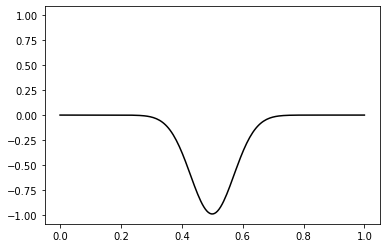

In [18]:
fig  = plt.figure()
plts = []             # get ready to populate this list the Line artists to be plotted

for t in np.linspace(t0, 1, 100):
    fourier = np.zeros_like(x_eval)
    for k in range(N):
        onda      = lambda x: np.sin((np.pi*(k+1)/L)*x)
        onda_eval = onda(x_eval)
        fourier   = fourier + Xk[k]*np.cos(np.pi*(k+1)*t/L)*onda_eval
    p, = plt.plot(x_eval, fourier, 'k', label='t=%.3f'%t)
    plts.append( [p] )           # ... but save the line artist for the animation
    
ani = matplotlib.animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)   # run the animation
ani.save('wave.mp4')    # optionally save it to a file
plt.show()

## Discretización espacial, solución temporal exacta

Comparamos ahora con otro enfoque: Reemplazamos la función inicial $u$ de una variable real por un vector con los valores de $u$ en los puntos de un mallado:

$$
\overrightarrow{u}=\left(u(x_1),\dots,u(x_j),\dots,u(x_{n-1})\right),\quad
x_j=x_0+j\cdot h
$$
Observa que no incluimos $u(x_0)$ ni $u(x_n)$, porque son siempre 0 por definición.

Reemplazamos la ecuación en derivadas parciales (con $c=1$):
$$
\partial_{tt}u = \partial_{xx}u
$$
por la siguiente ecuación diferencial ordinaria
$$
\partial_{tt}\overrightarrow{u} = D\cdot \overrightarrow{u}
$$
donde $D$ es un operador de diferencias finitas (que aprovecha que $u(x_0)=u(x_n)=0$):
$$
D\cdot \overrightarrow{u}=\left(\frac{-2u(x_1)+u(x_{2})}{h^2},
\frac{u(x_{1})-2u(x_2)+u(x_{3})}{h^2},
\dots,
\frac{u(x_{j-1})-2u(x_j)+u(x_{j+1})}{h^2},\dots\right)
$$

La matriz $D$ es una vieja conocida:
$$D=\frac{1}{h^2}\left(\begin{array}{rrrrr}
-2.0 & 1.0 & 0.0 & 0.0 & 0.0 \\
1.0 & -2.0 & 1.0 & 0.0 & 0.0 \\
0.0 & 1.0 & -2.0 & 1.0 & 0.0 \\
0.0 & 0.0 & 1.0 & -2.0 & 1.0 \\
0.0 & 0.0 & 0.0 & 1.0 & -2.0
\end{array}\right)$$

In [19]:
def diff_fin_matrix(n):
    return np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)

D = diff_fin_matrix(5)
print(D)

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


Este sistema de EDOs se puede resolver de forma exacta.
El primer paso es expresarlo como un sistema de primer orden:
$$
\frac{\partial}{\partial t}
\left(
\begin{array}{c}
\overrightarrow{u}\\
\overrightarrow{v}
\end{array} \right)=
\left(
\begin{array}{c|c}
\mathbf{0}&\mathbf{Id}\\
\hline
D&\mathbf{0}
\end{array}
\right)\cdot
\left(
\begin{array}{c}
\overrightarrow{u}\\
\overrightarrow{v}
\end{array}
\right)$$
Llamamos a esta matriz 
$$
C = \left(
\begin{array}{c|c}
\mathbf{0}&\mathbf{Id}\\
\hline
D&\mathbf{0}
\end{array}
\right)
$$
y la solución es:
$$
\left(
\begin{array}{c}
\overrightarrow{u}(t)\\
\overrightarrow{v}(t)
\end{array} \right)=
e^{t\cdot C}\cdot \left(
\begin{array}{c}
\overrightarrow{u}(0)\\
\overrightarrow{v}(0)
\end{array} \right)
$$

In [20]:
L  = 1
Nx = 50
h  = L/Nx

t0 = 0
tf = 1

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)
v0 = np.zeros((Nx-1,))
uv0 = np.concatenate([u0,v0])

C = np.zeros((2*(Nx-1),2*(Nx-1)))
C[Nx-1:,:Nx-1] = -(1/h**2)*diff_fin_matrix(Nx-1)
C[:Nx-1,Nx-1:] = np.eye(Nx-1)

nframes = 6
ts = np.linspace(t0, tf, nframes)

plt.figure(figsize=(8,8))
for t in ts:
    uv_t = la.expm(t*C)@uv0
#   print(uv_t)
    u_t = np.zeros(Nx+1)
    u_t[1:-1] = uv_t[:Nx-1]
    plt.plot(xs, u_t, label='t=%.3f'%t)

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal exacta del problema espacial discretizado')

Text(0.5, 1.0, 'Integración temporal exacta del problema espacial discretizado')

### Ejercicio (Método adaptativo de Runge-Kutta 4,5)

Resuelve el sistema de EDOs anterior usando el método adaptativo de Runge-Kutta (4,5), llamando al método `solve_ivp` de `scipy.integrate`.

 - Plantea la función `f` que define la ecuación diferencial 
$
\frac{\partial}{\partial t}
\left(
\begin{array}{c}
\overrightarrow{u}\\
\overrightarrow{v}
\end{array} \right)=
C\cdot
\left(
\begin{array}{c}
\overrightarrow{u}\\
\overrightarrow{v}
\end{array}
\right)$
 - La condición inicial es la concatenación de los valores de `u` y su derivada `v` en los puntos interiores.
 - La solución contendrá los valores de `u` y `v` en los puntos interiores y para varios instantes temporales.

Text(0.5, 1.0, 'Integración temporal exacta del problema espacial discretizado')

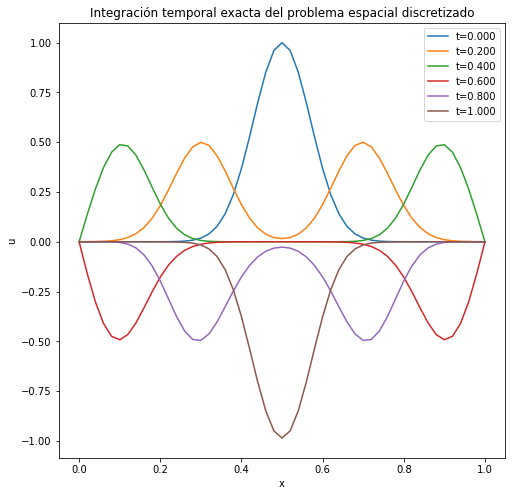

In [21]:
L  = 1
Nx = 50
h  = L/Nx

t0 = 0
tf = 1

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)
v0 = np.zeros((Nx-1,))
uv0 = np.concatenate([u0,v0])

C = np.zeros((2*(Nx-1),2*(Nx-1)))
C[Nx-1:,:Nx-1] = -(1/h**2)*diff_fin_matrix(Nx-1)
C[:Nx-1,Nx-1:] = np.eye(Nx-1)

nframes = 6
ts = np.linspace(t0, tf, nframes)

def fun(t, ys):
    return C@ys

sol = integ.solve_ivp(
    fun, [t0, tf], uv0, t_eval=ts
)
ys = sol['y']
us = ys[:Nx-1,:]

plt.figure(figsize=(8,8))
for i in range(nframes):
    t = ts[i]
    uv_t = ys[:Nx-1, :]
    u_t = np.zeros(Nx+1)
    u_t[1:-1] = us[:, i]
    plt.plot(xs, u_t, label='t=%.3f'%t)

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal exacta del problema espacial discretizado')

# Ecuación de ondas con diferencias finitas

Ya que hemos reemplazado la derivada espacial por una aproximación numérica, tiene sentido intentar reemplazar también la derivada temporal por una regla de derivación numérica. Esta técnica se conoce como __diferencias finitas__.

Como el tiempo avanza desde la solución inicial y hemos definido $v=u_t$, podemos aproximar la derivada $u_{tt}$ así:

$$
\partial_{t}u(t_{j},x) = v(t_j, x)
$$
$$
\partial_{tt}u(t_{j},x)\approx \frac{u_t(t_{j+1},x) - u_t(t_j,x)}{k} 
= \frac{v(t_{j+1},x) - v(t_j,x)}{k}
$$
para un _paso temporal $k$_. Ésto nos permite avanzar en el tiempo de esta forma:
$$
\begin{array}{lcl}
\overrightarrow{u}_{j+1} &=& \overrightarrow{u}_j + k \overrightarrow{v}_j\\
\overrightarrow{v}_{j+1} &=& \overrightarrow{v}_j + k D\cdot \overrightarrow{u}_j
\end{array}
$$



Usar la técnica de diferencias finitas anterior es equivalente a usar un método de Euler para integrar el sistema de primer orden:
$$
\frac{\partial}{\partial t}
\left(
\begin{array}{c}
\overrightarrow{u}\\
\overrightarrow{v}
\end{array} \right)=
\left(
\begin{array}{c|c}
\mathbf{0}&\mathbf{Id}\\
\hline
D&\mathbf{0}
\end{array}
\right)\cdot
\left(
\begin{array}{c}
\overrightarrow{u}\\
\overrightarrow{v}
\end{array}
\right)$$

In [22]:
L  = 1
Nx = 100
h  = L/Nx

t0 = 0
tf = 1
Nt = 700
k  = (tf - t0)/Nt

lamb = k/h

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)
v0 = np.zeros((Nx-1,))

A = -(1/h**2)*diff_fin_matrix(Nx-1)
u = np.zeros((Nt+1,Nx+1)) #solution to WE
u[0,1:-1] = u0
vt = v0
for j in range(Nt):
    ut_int = u[j,1:-1]
    u_new = ut_int + k*vt
    vt = vt + k*A@ut_int
    u[j+1,1:-1] = u_new

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal con Euler del problema espacial discretizado')

Text(0.5, 1.0, 'Integración temporal con Euler del problema espacial discretizado')

### Ejercicio

Observa que para Nx=100 divisiones espaciales y Nt = 700 divisiones espaciales, aparecen oscilaciones al final del intervalo temporal. Comprueba que con un intervalo de tiempo un poco mayor o unas pocas divisiones espaciales más, las oscilaciones crecen de forma exponencial.

Text(0.5, 1.0, 'Integración temporal con Euler del problema espacial discretizado')

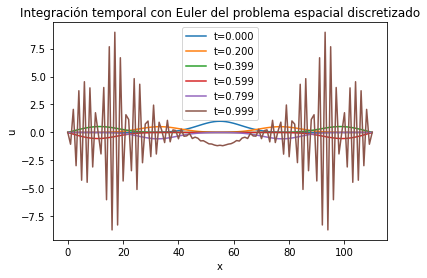

In [23]:
L  = 1
Nx = 110
h  = L/Nx

t0 = 0
tf = 1
Nt = 700
k  = (tf - t0)/Nt

lamb = k/h

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)
v0 = np.zeros((Nx-1,))

A = -(1/h**2)*diff_fin_matrix(Nx-1)
u = np.zeros((Nt+1,Nx+1)) #solution to WE
u[0,1:-1] = u0
vt = v0
for j in range(Nt):
    ut_int = u[j,1:-1]
    u_new = ut_int + k*vt
    vt = vt + k*A@ut_int
    u[j+1,1:-1] = u_new

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal con Euler del problema espacial discretizado')

# Diferencia temporal de segundo orden

Es más habitual usar una diferencia centrada de segundo orden para aproximar la derivada temporal, ya que hemos usado una diferencia centrada para aproximar la derivada espacial:
$$
\partial_{tt}u(t_{j},x)\approx \frac{u(t_{j+1},x) - 2u(t_j,x) +u(t_{j-1},x)}{k^2}
$$
Observa que es necesario hacer un apaño para dar el primer paso desde la posición inicial, porque necesitamos los dos últimos pasos para dar el paso siguiente.

Text(0.5, 1.0, 'Integración temporal de segundo orden del problema espacial discretizado')

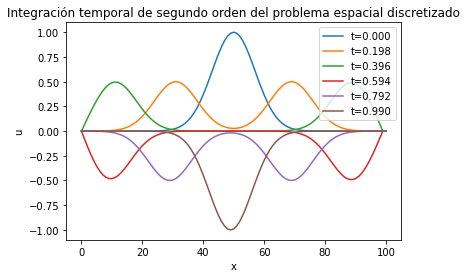

In [24]:
L  = 1
Nx = 100
h  = L/Nx

t0 = 0
tf = 1
Nt = 100
k = (tf - t0)/Nt

c = 1.0
lamb2 = c*(k/h)**2

xs = np.linspace(0, L, Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)
u = np.zeros((Nt+1,Nx+1))
u[0,1:-1] = u0
# El primer paso temporal es un poco delicado
# mas detalles en la seccion 12.3 del Burden Faires
# "Improving the Initial Approximation"

for a in range(1, Nx-1):
    u[1,a] = (1-lamb2)*u[0,a] + (lamb2/2)*(u[0,a-1]+u[0,a+1])

#El resto de pasos temporales siguen el mismo patron
for j in range(1, Nt):
    for a in range(1, Nx-1):
        u[j+1,a] = 2*(1-lamb2)*u[j,a]-u[j-1,a]+lamb2*(u[j,a-1]+u[j,a+1])

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal de segundo orden del problema espacial discretizado')

Usar una diferencia temporal de orden 2 no evita necesariamente la inestabilidad que observamos con el método de Euler.

Al aplicar este método a la ecuación de ondas
$$
\partial_{tt}u = c^2\partial_{xx}u,
$$
con un paso espacial $h$ y un paso temporal $k$, la __condición de estabilidad de Courant__ se define así:
$$
\frac{ck}{h}<1.
$$
La condición de estabilidad es necesaria para que el método converja. Es la misma que aparece en la ecuación de transporte, porque están muy relacionadas. La ecuación de ondas se puede factorizar como dos ecuaciones de transporte:
$$
{\displaystyle \left[{\frac {\partial }{\partial t}}-c{\frac {\partial }{\partial x}}\right]\left[{\frac {\partial }{\partial t}}+c{\frac {\partial }{\partial x}}\right]u=0.\,}
$$
lo que da lugar a la [fórmula de D'Alembert](https://es.wikipedia.org/wiki/F%C3%B3rmula_de_d%27Alembert)

### Ejercicio

Prueba a cambiar el intervalo temporal, el número de divisiones espaciales y temporales, de modo que la condición de estabilidad no se cumpla, pero por un margen estrecho (por ejemplo $1<\frac{ck}{h}<2$), y observa si la solución es estable.

Text(0.5, 1.0, 'Integración temporal de segundo orden del problema espacial discretizado')

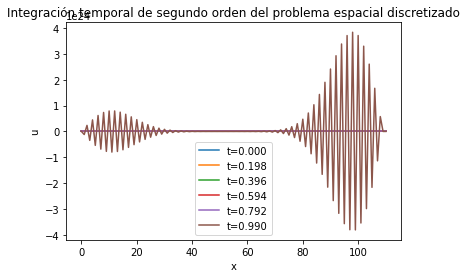

In [25]:
L  = 1
Nx = 110
h  = L/Nx

t0 = 0
tf = 1
Nt = 100
k = (tf - t0)/Nt

c = 1.0
lamb2 = c*(k/h)**2

xs = np.linspace(0, L, Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)
u = np.zeros((Nt+1,Nx+1))
u[0,1:-1] = u0
# El primer paso temporal es un poco delicado
# mas detalles en la seccion 12.3 del Burden Faires
# "Improving the Initial Approximation"

for a in range(1, Nx-1):
    u[1,a] = (1-lamb2)*u[0,a] + (lamb2/2)*(u[0,a-1]+u[0,a+1])

#El resto de pasos temporales siguen el mismo patron
for j in range(1, Nt):
    for a in range(1, Nx-1):
        u[j+1,a] = 2*(1-lamb2)*u[j,a]-u[j-1,a]+lamb2*(u[j,a-1]+u[j,a+1])

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal de segundo orden del problema espacial discretizado')

### Ejercicio opcional

Para el método de Euler usamos "código vectorizado" dentro de cada paso temporal:
```python
for j in range(Nt):
    ut_int = u[j,1:-1]
    u_new = ut_int + k*vt
    vt = vt + k*A@ut_int
    u[j+1,1:-1] = u_new
```
Sin embargo, para la diferencia temporal de orden 2, hemos usado un bucle doble, que es más lento:
```python
for j in range(1, Nt):
    for a in range(1, Nx-1):
        u[j+1,a] = 2*(1-lamb2)*u[j,a]-u[j-1,a]+lamb2*(u[j,a-1]+u[j,a+1])
```

Reescribe este método usando un sólo bucle, que itera sobre el paso temporal, pero usando operaciones con arrays para las operaciones espaciales, como hicimos con el método de Euler.

Text(0.5, 1.0, 'Integración temporal de segundo orden del problema espacial discretizado')

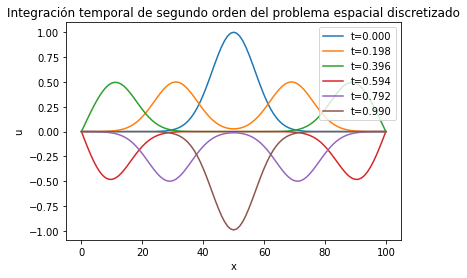

In [26]:
L  = 1
Nx = 100
h  = L/Nx

t0 = 0
tf = 1
Nt = 100
k = (tf - t0)/Nt

c = 1.0
lamb2 = c*(k/h)**2

xs = np.linspace(0, L, Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)
u = np.zeros((Nt+1,Nx+1))
u[0,1:-1] = u0
# El primer paso temporal es un poco delicado
# mas detalles en la seccion 12.3 del Burden Faires
# "Improving the Initial Approximation"

#for a in range(1, Nx-1):
#    u[1,a] = (1-lamb2)*u[0,a] + (lamb2/2)*(u[0,a-1]+u[0,a+1])
u[1,1:-1] = (1-lamb2)*u[0,1:-1] + (lamb2/2)*(u[0,:-2]+u[0,2:])

#El resto de pasos temporales siguen el mismo patron
#for j in range(1, Nt):
#    for a in range(1, Nx-1):
#        u[j+1,a] = 2*(1-lamb2)*u[j,a]-u[j-1,a]+lamb2*(u[j,a-1]+u[j,a+1])
for j in range(1, Nt):
    u[j+1,1:-1] = 2*(1-lamb2)*u[j,1:-1]-u[j-1,1:-1]+lamb2*(u[j,:-2]+u[j,2:])

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal de segundo orden del problema espacial discretizado')

# Ecuaciones de orden superior. Ecuación de difusión

Vamos a resolver, utilizando el método de diferencias finitas, la ecuación de difusión:

$$ \partial_t u(t,x) = \partial_{xx} u(t,x),\quad 0<x<1, $$

con condiciones de contorno:

$$ u(t,0)=u(t,1)=0, $$

y condición inicial 

$$ u(0,x)= e^{-(x-0.5)^2/0.01}, $$

### Ejercicio.

Implementa el método de diferencias finitas para resolver el problema de valor inicial anterior.

> Comenzamos a plantear el método de diferencias finitas igual que hicimos para la ecuación de ondas: Reemplazamos la función inicial $u$ de una variable real por un vector con los valores de $u$ en los puntos de un mallado:

$$
\overrightarrow{u}=\left(u(x_1),\dots,u(x_j),\dots,u(x_{n-1})\right),\quad
x_j=x_0+j\cdot h
$$
> Observa que no incluimos $u(x_0)$ ni $u(x_n)$, porque son siempre 0 por definición.

> Reemplazamos la ecuación en derivadas parciales (con $c=1$):
$$
\partial_{t}u = \partial_{xx}u
$$
> por la siguiente ecuación diferencial ordinaria
$$
\partial_{t}\overrightarrow{u} = D\cdot \overrightarrow{u}
$$
> donde $D$ es un operador de diferencias finitas (que aprovecha que $u(x_0)=u(x_n)=0$):
$$
D\cdot \overrightarrow{u}=\left(\frac{-2u(x_1)+u(x_{2})}{h^2},
\frac{u(x_{1})-2u(x_2)+u(x_{3})}{h^2},
\dots,
\frac{u(x_{j-1})-2u(x_j)+u(x_{j+1})}{h^2},\dots\right)
$$

> La matriz $D$ es la misma que vimos en la ecuación de ondas, ya que aproxima el mismo operador diferencial:
$$D=\frac{1}{h^2}\left(\begin{array}{rrrrr}
-2.0 & 1.0 & 0.0 & 0.0 & 0.0 \\
1.0 & -2.0 & 1.0 & 0.0 & 0.0 \\
0.0 & 1.0 & -2.0 & 1.0 & 0.0 \\
0.0 & 0.0 & 1.0 & -2.0 & 1.0 \\
0.0 & 0.0 & 0.0 & 1.0 & -2.0
\end{array}\right)$$



> Como el tiempo avanza desde la solución inicial, podemos aproximar la derivada $u_{t}$ así:

$$
\partial_{t}u(t_{j},x)\approx \frac{u(t_{j+1},x) - u(t_j,x)}{k}
$$
> para un _paso temporal $k$_. Ésto nos permite avanzar en el tiempo de esta forma:
$$
\begin{array}{lcl}
\overrightarrow{u}_{j+1} &=& \overrightarrow{u}_j + k D\cdot \overrightarrow{u}_j
\end{array}
$$
> Simplicamos el código de la ecuación de ondas:

/tmp/ipykernel_207568/1039722453.py:27: RuntimeWarning: overflow encountered in matmul
  u_new = ut_int + k*A@ut_int
/tmp/ipykernel_207568/1039722453.py:27: RuntimeWarning: invalid value encountered in matmul
  u_new = ut_int + k*A@ut_int


Text(0.5, 1.0, 'Integración temporal con Euler del problema espacial discretizado')

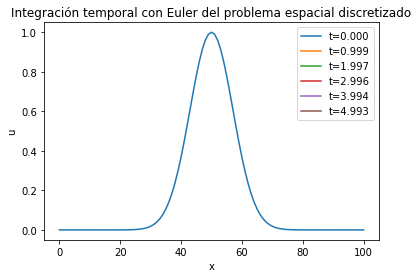

In [27]:
def init_fn(x):
    return np.exp(-(x-.5)**2/0.01)

def diff_fin_matrix(n):
    return np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)

L  = 1
Nx = 100
h  = L/Nx

t0 = 0
tf = 5
Nt = 700
k  = (tf - t0)/Nt

lamb = k/h

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)

A = -(1/h**2)*diff_fin_matrix(Nx-1)
u = np.zeros((Nt+1,Nx+1)) #solution to WE
u[0,1:-1] = u0
for j in range(Nt):
    ut_int = u[j,1:-1]
    u_new = ut_int + k*A@ut_int
    u[j+1,1:-1] = u_new

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal con Euler del problema espacial discretizado')

> - Observamos que la gráfica es extraña: no vemos la solución para t= 1, 2, ... 5
> - Comprobamos que los avisos ` RuntimeWarning: overflow encountered in matmul` no han sido en vano, y la solución explota, como ocurría con la ecuación de ondas

In [28]:
u[100,:]

array([ 0.00000000e+000,  1.67059528e+231, -3.24347584e+231,
        4.63036021e+231, -5.76057080e+231,  6.58689426e+231,
       -7.08847045e+231,  7.27052709e+231, -7.16125598e+231,
        6.80651643e+231, -6.26329206e+231,  5.59288930e+231,
       -4.85476233e+231,  4.10162101e+231, -3.37618422e+231,
        2.70964465e+231, -2.12166243e+231,  1.62153740e+231,
       -1.21013330e+231,  8.82133860e+230, -6.28277851e+230,
        4.37321828e+230, -2.97588529e+230,  1.98056207e+230,
       -1.29017530e+230,  8.23819128e+229, -5.17145697e+229,
        3.21049633e+229, -1.99439477e+229,  1.26695900e+229,
       -8.52159673e+228,  6.32684156e+228, -5.32523619e+228,
        5.03635348e+228, -5.16220655e+228,  5.51945624e+228,
       -5.99406900e+228,  6.51223479e+228, -7.02256605e+228,
        7.48584560e+228, -7.86966971e+228,  8.14616806e+228,
       -8.29157855e+228,  8.28685418e+228, -8.11873615e+228,
        7.78089195e+228, -7.27482967e+228,  6.61038748e+228,
       -5.80567401e+228,

> - Aumentamos el paso temporal para que la solución converja (¡es un método de Euler explícito, es normal que diverja y aumentar el paso arregla el problema!). Es necesario aumentar el paso mucho respecto del paso espacial (consecuencia de que para el paso espacial usamos una diferencia de orden 2 y para el paso temporal hemos usado una diferencia de orden 1).

Text(0.5, 1.0, 'Integración temporal con Euler del problema espacial discretizado')

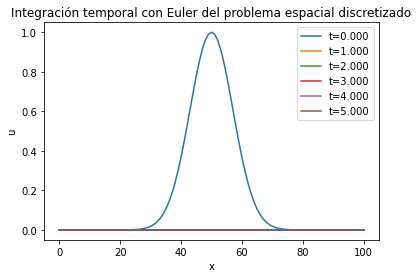

In [29]:
def init_fn(x):
    return np.exp(-(x-.5)**2/0.01)

def diff_fin_matrix(n):
    return np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)

L  = 1
Nx = 100
h  = L/Nx

t0 = 0
tf = 5
Nt = 100000
k  = (tf - t0)/Nt

lamb = k/h

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)

A = -(1/h**2)*diff_fin_matrix(Nx-1)
u = np.zeros((Nt+1,Nx+1)) #solution to WE
u[0,1:-1] = u0
for j in range(Nt):
    ut_int = u[j,1:-1]
    u_new = ut_int + k*A@ut_int
    u[j+1,1:-1] = u_new

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal con Euler del problema espacial discretizado')

> - La solución es un poco _'extraña'_, pero no hay problema de inestabilidad, y es la solución correcta: el calor se disipa casi por completo en tiempo 1. Poniendo más fotogramas, o reduciendo el tiempo final, apreciamos la evolución del perfil de calor:

Text(0.5, 1.0, 'Integración temporal con Euler del problema espacial discretizado')

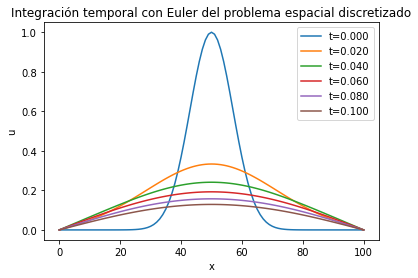

In [30]:
def init_fn(x):
    return np.exp(-(x-.5)**2/0.01)

def diff_fin_matrix(n):
    return np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)

L  = 1
Nx = 100
h  = L/Nx

t0 = 0
tf = 0.1
Nt = 100000
k  = (tf - t0)/Nt

lamb = k/h

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)

A = -(1/h**2)*diff_fin_matrix(Nx-1)
u = np.zeros((Nt+1,Nx+1)) #solution to WE
u[0,1:-1] = u0
for j in range(Nt):
    ut_int = u[j,1:-1]
    u_new = ut_int + k*A@ut_int
    u[j+1,1:-1] = u_new

for t in np.linspace(0, Nt-1, 6):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal con Euler del problema espacial discretizado')

Text(0.5, 1.0, 'Integración temporal con Euler del problema espacial discretizado')

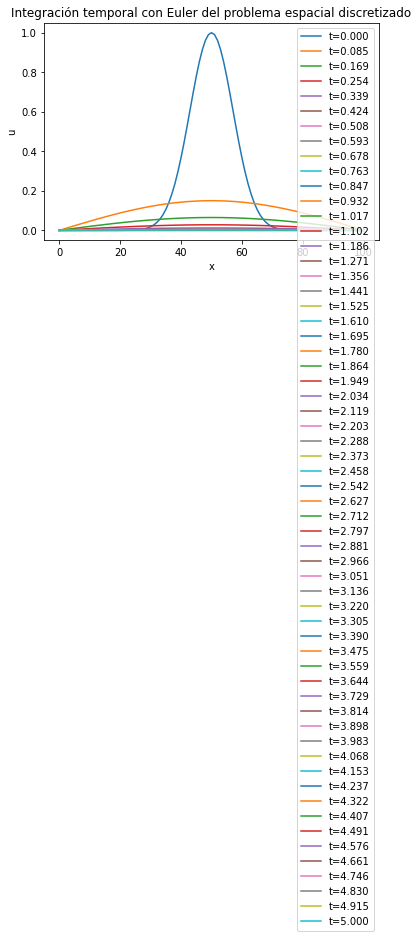

In [31]:
def init_fn(x):
    return np.exp(-(x-.5)**2/0.01)

def diff_fin_matrix(n):
    return np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)

L  = 1
Nx = 100
h  = L/Nx

t0 = 0
tf = 5
Nt = 100000
k  = (tf - t0)/Nt

lamb = k/h

xs = np.linspace(0, L , Nx+1)
xs_int = xs[1:-1]
u0 = init_fn(xs_int)

A = -(1/h**2)*diff_fin_matrix(Nx-1)
u = np.zeros((Nt+1,Nx+1)) #solution to WE
u[0,1:-1] = u0
for j in range(Nt):
    ut_int = u[j,1:-1]
    u_new = ut_int + k*A@ut_int
    u[j+1,1:-1] = u_new

for t in np.linspace(0, Nt-1, 60):
    plt.plot(u[int(t),:], label='t=%.3f'%(t*k))
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Integración temporal con Euler del problema espacial discretizado')

> - Conclusión: esta técnica no es la mejor para esta ecuación, que se puede resolver de forma exacta usando la serie de senos, un método adaptativo para la evolución temporal, o una diferencia de orden 2 para el paso temporal, entre otros...